# Overview of raw data part2

+ analyze the corrlation between different attribute
+ In this section I will focus on training set, and try to find different behaviors between positive samples and negative samples(age), 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df_train = pd.read_csv("data/Assignment3_TrainingSet.csv")
df_train.drop(columns=['row ID'], inplace=True)  # remove row ID
print(df_train.shape)
df_train.head(3)

(32950, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Final_Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [3]:
df_test = pd.read_csv("data/Assignment3_TestingSet.csv")
df_test.drop(columns=['row ID'], inplace=True)
print(df_test.shape)
df_test.head(3)

(8238, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,146,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,54,management,married,basic.4y,unknown,yes,no,telephone,may,mon,230,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


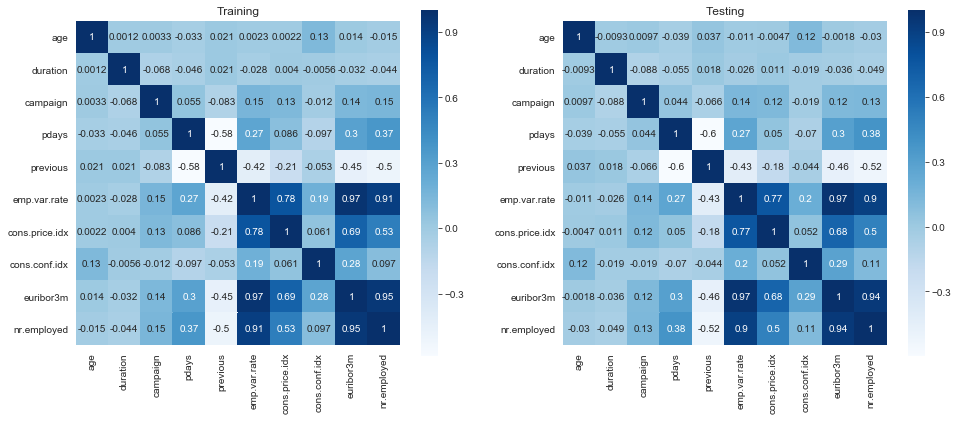

In [4]:
# high correlation (numeric attributes only): emp.var.rate / euribor3m / nr.employed
plt.figure(figsize=(16,14))
plt.subplot(221)
df_train_noY = df_train.drop(columns=['Final_Y'])
sns.heatmap(df_train_noY.corr(), annot=True, vmax=1, square=True, cmap="Blues")
plt.title("Training")
plt.subplot(222)
sns.heatmap(df_test.corr(), annot=True, vmax=1, square=True, cmap="Blues")
plt.title("Testing")
plt.show()

## Compare the positive and negative samples in Training set

In [5]:
df_train_pos = df_train.loc[df_train['Final_Y'] == 1]
df_train_neg = df_train.loc[df_train['Final_Y'] == 0]
print("Pos {}|Neg {}".format(df_train_pos.shape, df_train_neg.shape))

Pos (3696, 21)|Neg (29254, 21)


In [7]:
# used for visualization
def to_percent(y, position):
    return "{:.2f}%".format(100*y)

formatter = FuncFormatter(to_percent)

In [8]:
# used for categorical data
def vis_cate_data(df_train_pos,df_train_neg,attribute,ylim=(0,50)):
    ticks = sorted(list(set(df_train_pos[attribute]) | set(df_train_neg[attribute])))
    pos_y = []
    neg_y = []
    for i in range(len(ticks)):
        pos_y.append(df_train_pos[df_train_pos[attribute] == ticks[i]].shape[0] * 100. / df_train_pos.shape[0])
        neg_y.append(df_train_neg[df_train_neg[attribute] == ticks[i]].shape[0] * 100. / df_train_neg.shape[0])
    pos_y = np.array(pos_y)
    neg_y = np.array(neg_y)
    pos_x = np.arange(pos_y.shape[0]) * 8
    neg_x = pos_x + 3
    plt.figure(figsize=(20,6))
    plt.bar(pos_x, pos_y, width=3, color='skyblue', label='Final_Y == 1')
    plt.bar(neg_x, neg_y, width=3, color='pink', label='Final_Y == 0')
    plt.ylabel('%')
    plt.ylim(ylim)
    plt.xticks(pos_x + 1, ticks)
    plt.xlabel(attribute)
    plt.legend()
    for i in range(len(ticks)):
        plt.text(pos_x[i]-1,pos_y[i]+1.5,s="{:.2f}".format(pos_y[i]))
        plt.text(neg_x[i]-0.5,neg_y[i]+0.5,s="{:.2f}".format(neg_y[i]))
    plt.show()

In [6]:
# Check whether two attributes are consistent with each other
# e.g. if the value of att1 is 'a', then the value of att2 must be 'b'
def check_consistency(df, att1, att2):
    for att1_idx in sorted(set(df[att1])):
        att2_set = set(df[df[att1] == att1_idx][att2])
        if len(att2_set) == 1:
            print("{} {} is consistent with {} {}".format(att1, att1_idx, att2, att2_set))
        else:
            print("{} {} is inconsistent with {} {}".format(att1, att1_idx, att2, att2_set))

---
### age

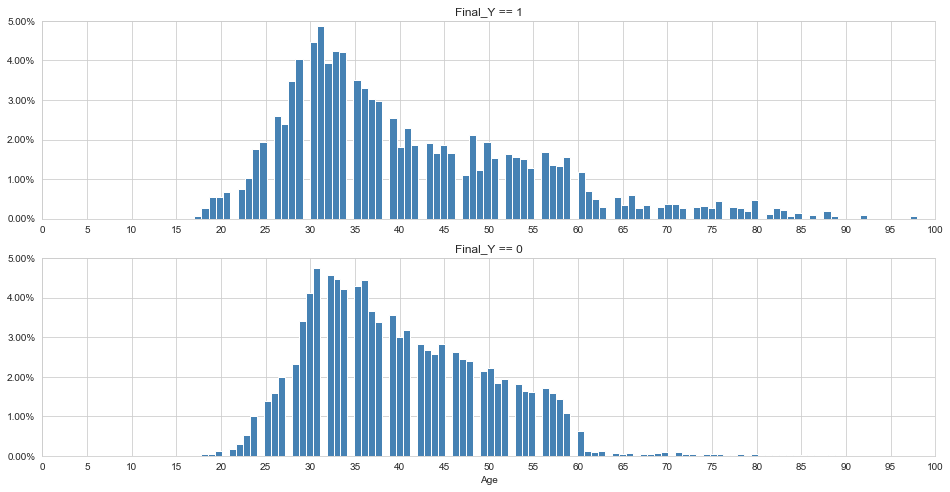

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['age'], bins=100, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.05)
plt.xlim(0,100)
plt.xticks(range(0,101,5))
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['age'], bins=100, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.05)
plt.xlim(0,100)
plt.xticks(range(0,101,5))
plt.xlabel('Age')
plt.show()

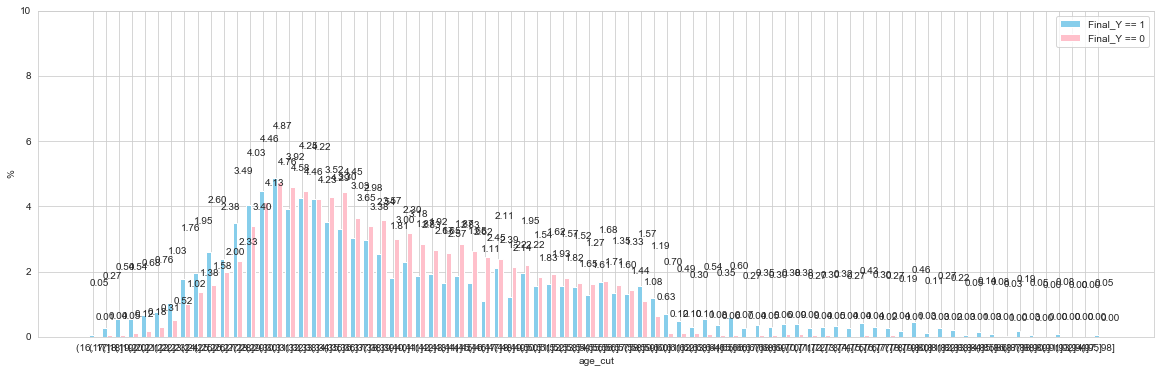

In [10]:
df_train_pos_copy = df_train_pos.copy()
df_train_neg_copy = df_train_neg.copy()
df_train_pos_copy.loc[:,'age_cut'] = pd.cut(df_train_pos['age'],bins=list(range(0,100)))
df_train_neg_copy.loc[:,'age_cut'] = pd.cut(df_train_neg['age'],bins=list(range(0,100)))
vis_cate_data(df_train_pos_copy, df_train_neg_copy, 'age_cut', (0,10))

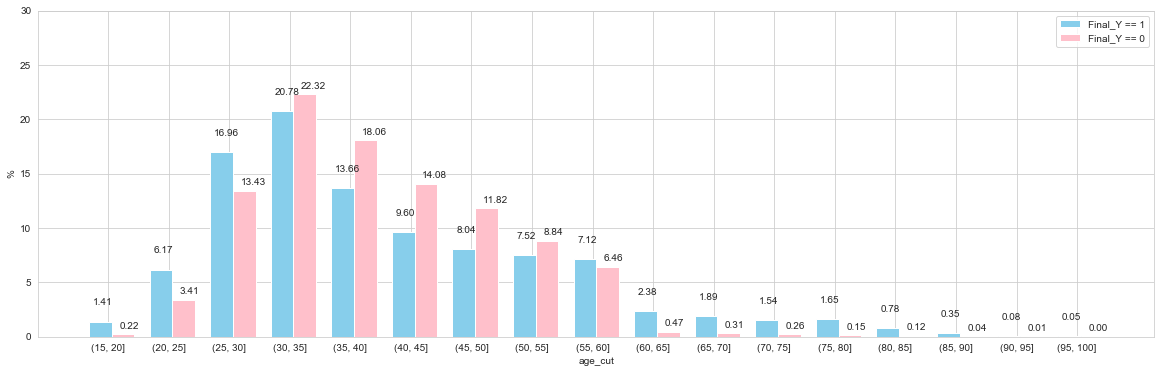

In [11]:
df_train_pos_copy = df_train_pos.copy()
df_train_neg_copy = df_train_neg.copy()
df_train_pos_copy.loc[:,'age_cut'] = pd.cut(df_train_pos['age'],bins=list(range(0,101,5)))
df_train_neg_copy.loc[:,'age_cut'] = pd.cut(df_train_neg['age'],bins=list(range(0,101,5)))
vis_cate_data(df_train_pos_copy, df_train_neg_copy, 'age_cut', (0,30))

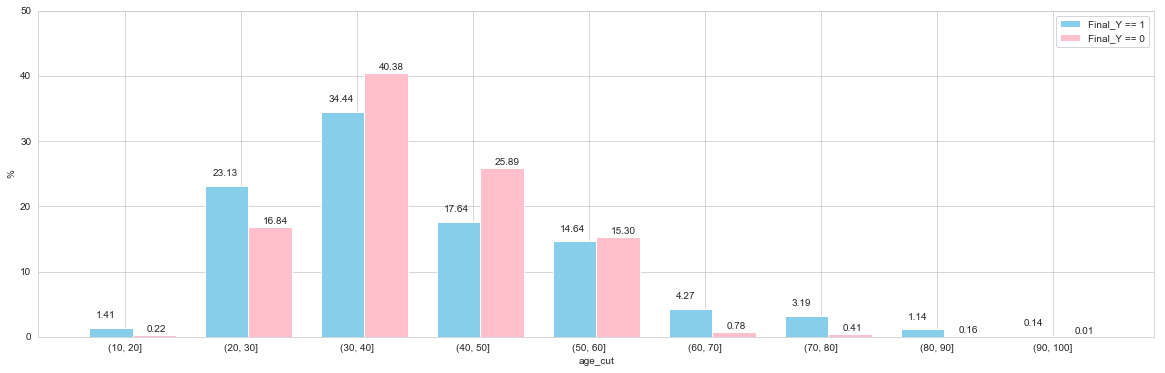

In [13]:
# from 0 to 100, bin by 10
df_train_pos_copy = df_train_pos.copy()
df_train_neg_copy = df_train_neg.copy()
df_train_pos_copy.loc[:,'age_cut'] = pd.cut(df_train_pos['age'],bins=list(range(0,101,10)))
df_train_neg_copy.loc[:,'age_cut'] = pd.cut(df_train_neg['age'],bins=list(range(0,101,10)))
vis_cate_data(df_train_pos_copy, df_train_neg_copy, 'age_cut', (0,50))

---

### campaign

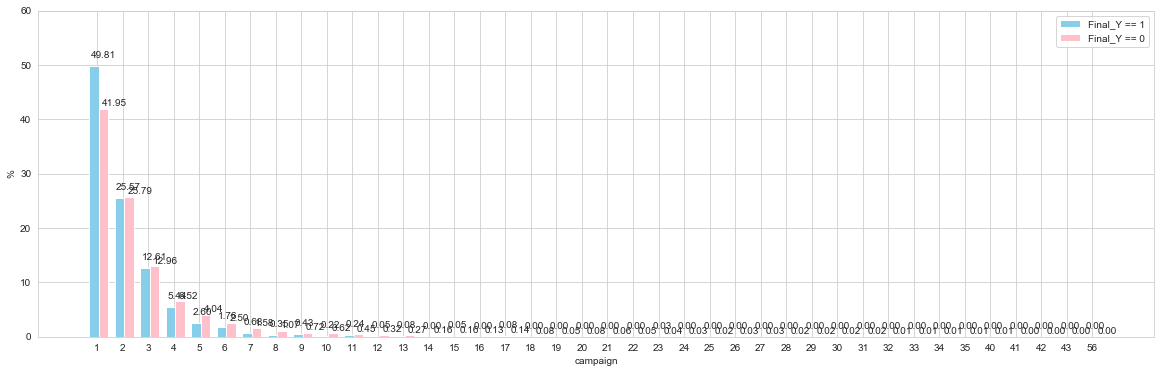

In [14]:
vis_cate_data(df_train_pos, df_train_neg, 'campaign', (0,60))

---

### cons.conf.idx

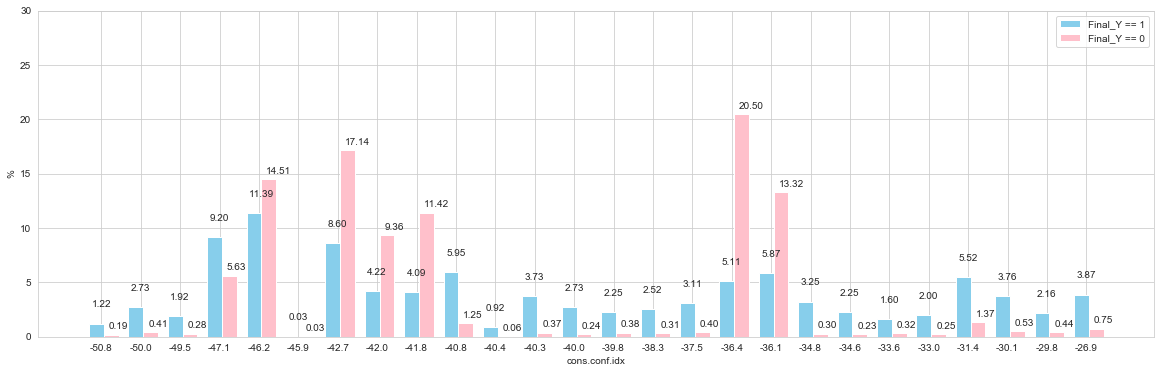

In [15]:
vis_cate_data(df_train_pos, df_train_neg, 'cons.conf.idx', (0,30))

---

### cons.price.idx

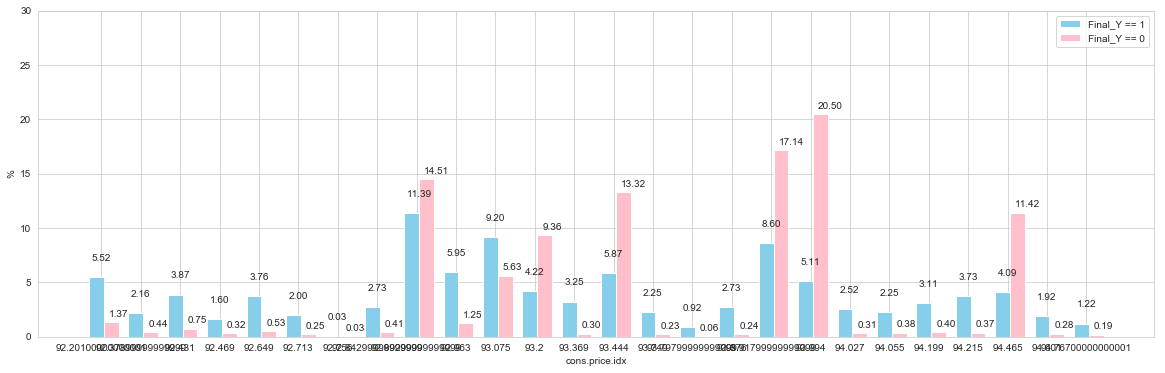

In [16]:
vis_cate_data(df_train_pos, df_train_neg, 'cons.price.idx', (0,30))

这里检查下cons.price.idx和cons.conf.idx是不是高度重合的

In [34]:
# these attributes are consistence, then I can remove one of them in propercessing
check_consistency(df_train, 'cons.conf.idx', 'cons.price.idx')

cons.conf.idx -50.8 is consistent with cons.price.idx {94.76700000000001}
cons.conf.idx -50.0 is consistent with cons.price.idx {92.84299999999999}
cons.conf.idx -49.5 is consistent with cons.price.idx {94.601}
cons.conf.idx -47.1 is consistent with cons.price.idx {93.075}
cons.conf.idx -46.2 is consistent with cons.price.idx {92.89299999999999}
cons.conf.idx -45.9 is consistent with cons.price.idx {92.756}
cons.conf.idx -42.7 is consistent with cons.price.idx {93.91799999999999}
cons.conf.idx -42.0 is consistent with cons.price.idx {93.2}
cons.conf.idx -41.8 is consistent with cons.price.idx {94.465}
cons.conf.idx -40.8 is consistent with cons.price.idx {92.963}
cons.conf.idx -40.4 is consistent with cons.price.idx {93.79799999999999}
cons.conf.idx -40.3 is consistent with cons.price.idx {94.215}
cons.conf.idx -40.0 is consistent with cons.price.idx {93.876}
cons.conf.idx -39.8 is consistent with cons.price.idx {94.055}
cons.conf.idx -38.3 is consistent with cons.price.idx {94.027}
co

---

### contact

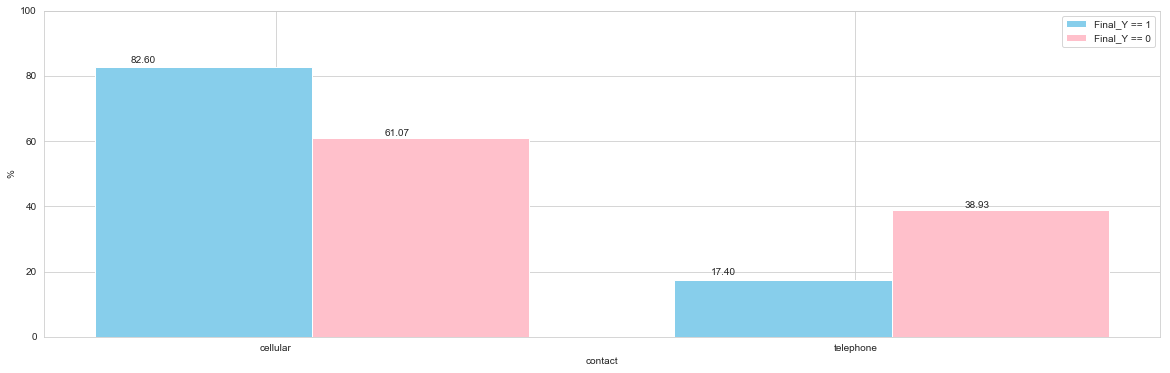

In [71]:
vis_cate_data(df_train_pos, df_train_neg, 'contact', (0,100))

---

### day_of_week

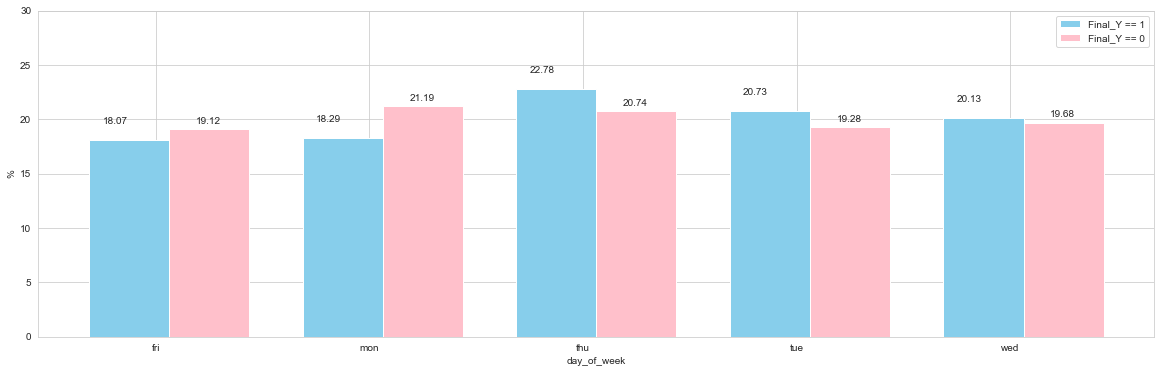

In [73]:
vis_cate_data(df_train_pos, df_train_neg, 'day_of_week', (0,30))

---

### default

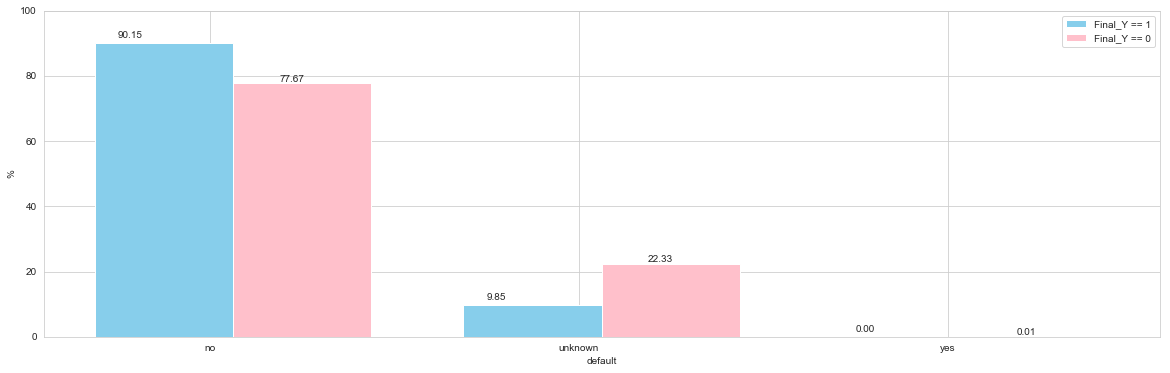

In [75]:
vis_cate_data(df_train_pos, df_train_neg, 'default', (0,100))

---

### duration

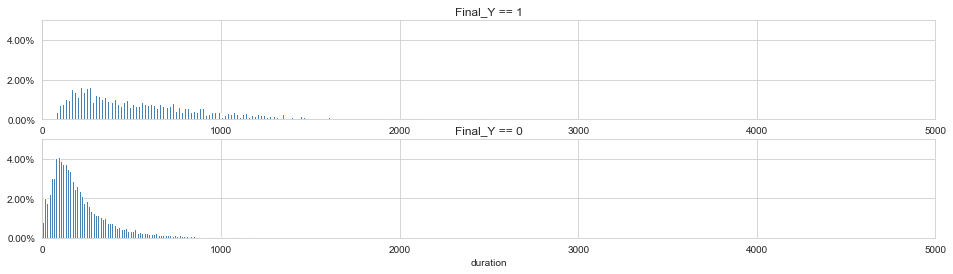

In [140]:
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['duration'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.05)
plt.xlim(0,5000)
# plt.xticks(range(0,41,5))
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['duration'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.05)
plt.xlim(0,5000)
# plt.xticks(range(0,41,5))
plt.xlabel('duration')
plt.show()

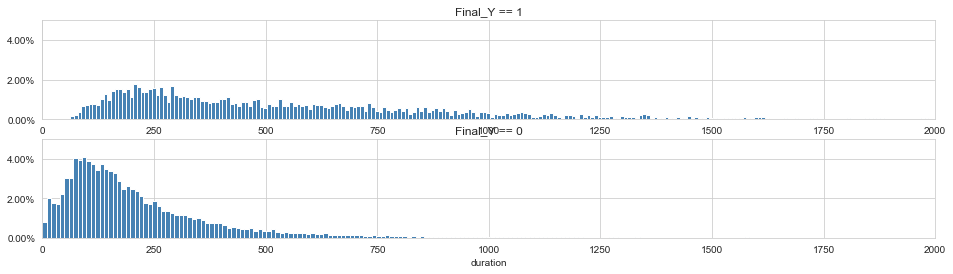

In [143]:
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['duration'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.05)
plt.xlim(0,2000)
# plt.xticks(range(0,41,5))
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['duration'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.05)
plt.xlim(0,2000)
# plt.xticks(range(0,41,5))
plt.xlabel('duration')
plt.show()

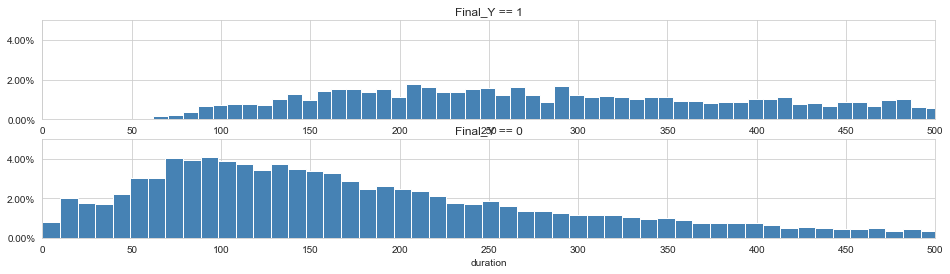

In [138]:
# 0 ~ 500
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['duration'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.05)
plt.xlim(0,500)
plt.xticks(range(0,501,50))
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['duration'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.05)
plt.xlim(0,500)
plt.xticks(range(0,501,50))
plt.xlabel('duration')
plt.show()

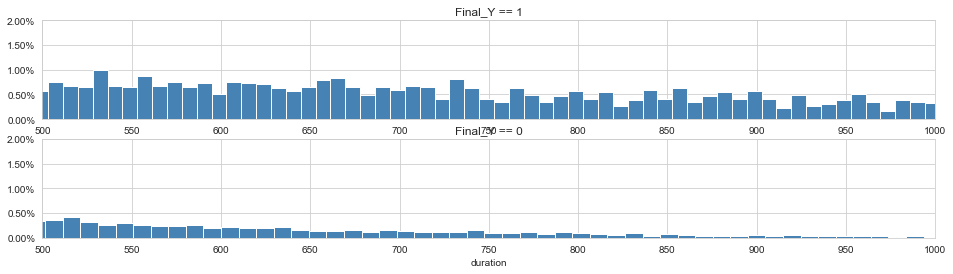

In [142]:
# 500 - 1000
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['duration'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.02)
plt.xlim(500,1000)
plt.xticks(range(500,1001,50))
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['duration'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.02)
plt.xlim(500,1000)
plt.xticks(range(500,1001,50))
plt.xlabel('duration')
plt.show()

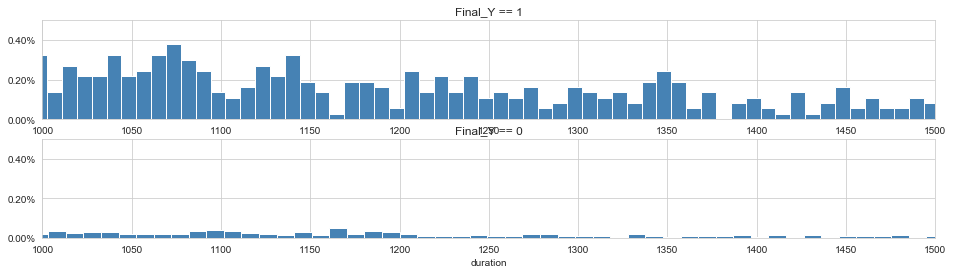

In [145]:
# 1000 - 1500
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['duration'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.005)
plt.xlim(1000,1500)
plt.xticks(range(1000,1501,50))
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['duration'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.005)
plt.xlim(1000,1500)
plt.xticks(range(1000,1501,50))
plt.xlabel('duration')
plt.show()

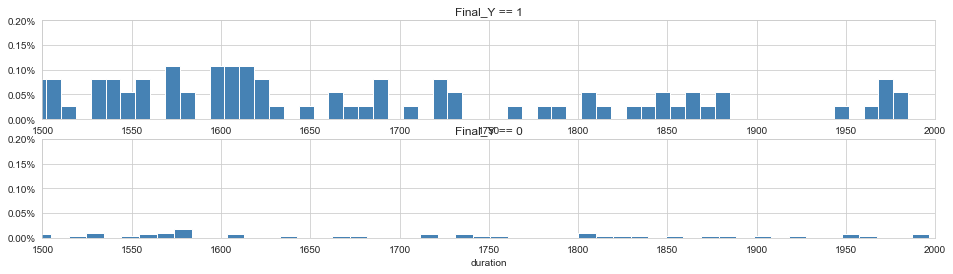

In [147]:
# 1500 - 2000
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['duration'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.002)
plt.xlim(1500,2000)
plt.xticks(range(1500,2001,50))
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['duration'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.002)
plt.xlim(1500,2000)
plt.xticks(range(1500,2001,50))
plt.xlabel('duration')
plt.show()

---

### education

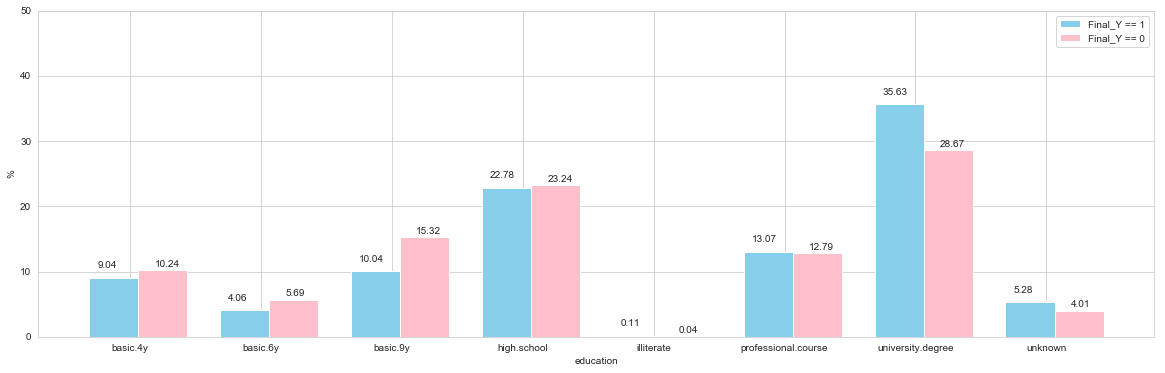

In [149]:
vis_cate_data(df_train_pos, df_train_neg, 'education', (0,50))

---

### emp.var.rate

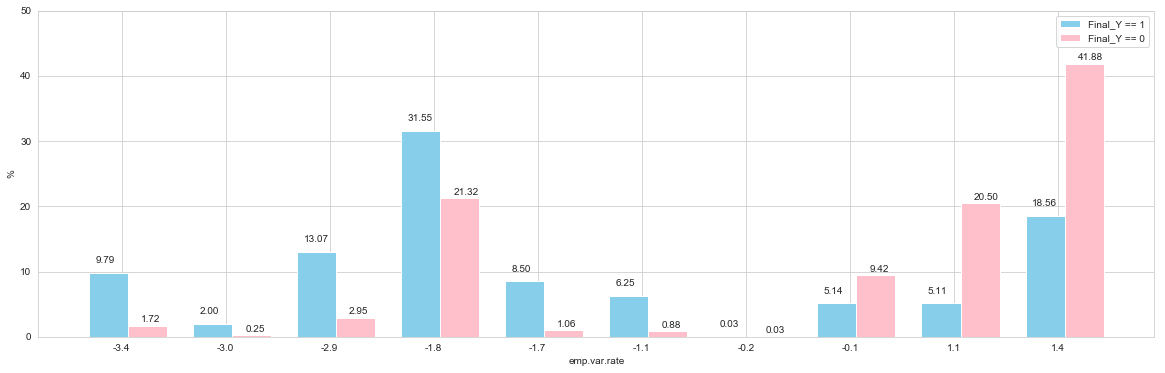

In [150]:
vis_cate_data(df_train_pos, df_train_neg, 'emp.var.rate', (0,50))

---

### euribor3m

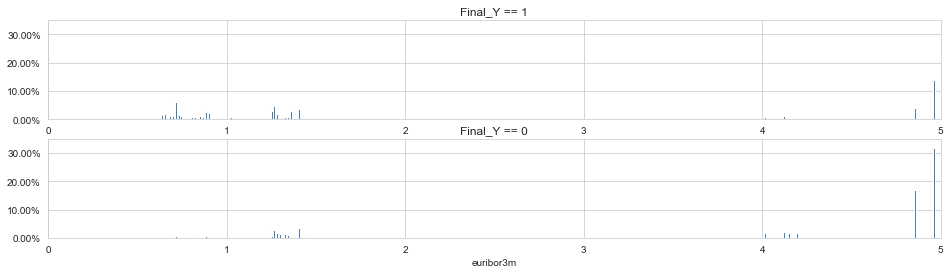

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['euribor3m'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.35)
plt.xlim(0,5)
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['euribor3m'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.35)
plt.xlim(0,5)
plt.xlabel('euribor3m')
plt.show()

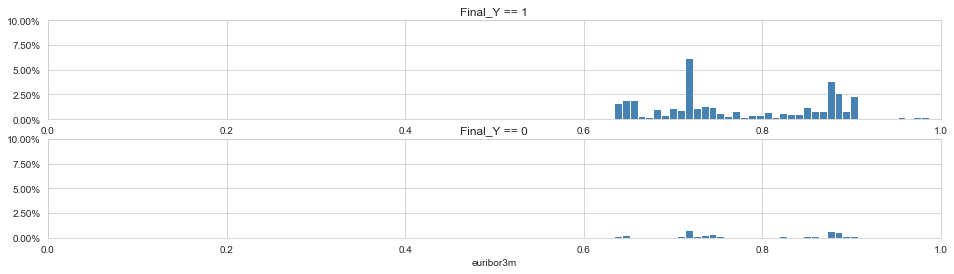

In [13]:
# 0-1
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['euribor3m'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.1)
plt.xlim(0,1)
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['euribor3m'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.1)
plt.xlim(0,1)
plt.xlabel('euribor3m')
plt.show()

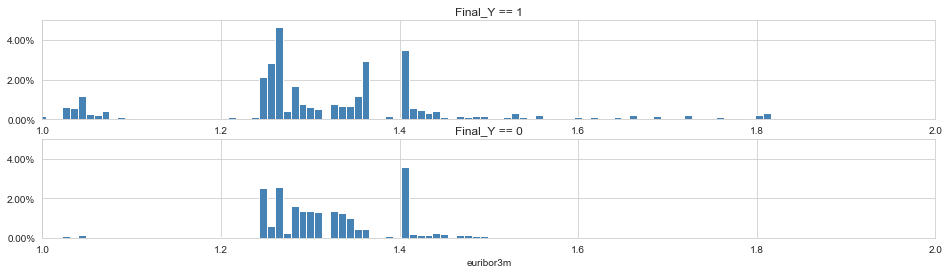

In [157]:
# 1-2
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['euribor3m'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.05)
plt.xlim(1,2)
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['euribor3m'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.05)
plt.xlim(1,2)
plt.xlabel('euribor3m')
plt.show()

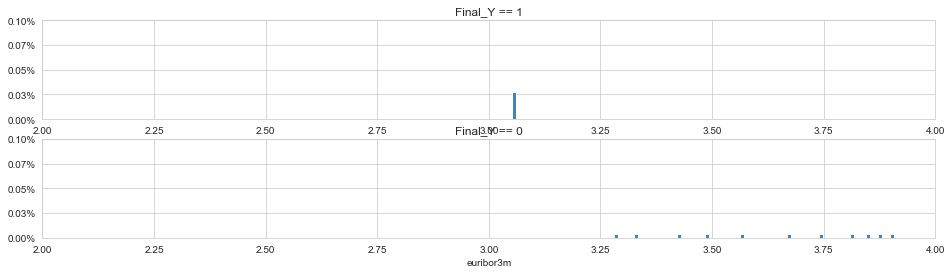

In [160]:
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['euribor3m'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.001)
plt.xlim(2,4)
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['euribor3m'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.001)
plt.xlim(2,4)
plt.xlabel('euribor3m')
plt.show()

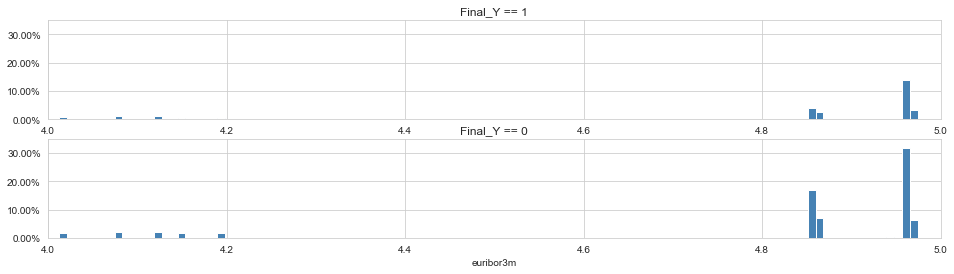

In [164]:
plt.figure(figsize=(16,4))
plt.subplot(211)
num_samples = df_train_pos.shape[0]
plt.hist(df_train_pos['euribor3m'], bins=500, color='steelblue', 
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 1")
plt.ylim(0,0.35)
plt.xlim(4,5)
plt.subplot(212)
num_samples = df_train_neg.shape[0]
plt.hist(df_train_neg['euribor3m'], bins=500, color='steelblue',
         weights=[1. / num_samples] * num_samples)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Final_Y == 0")
plt.ylim(0,0.35)
plt.xlim(4,5)
plt.xlabel('euribor3m')
plt.show()

---

### housing

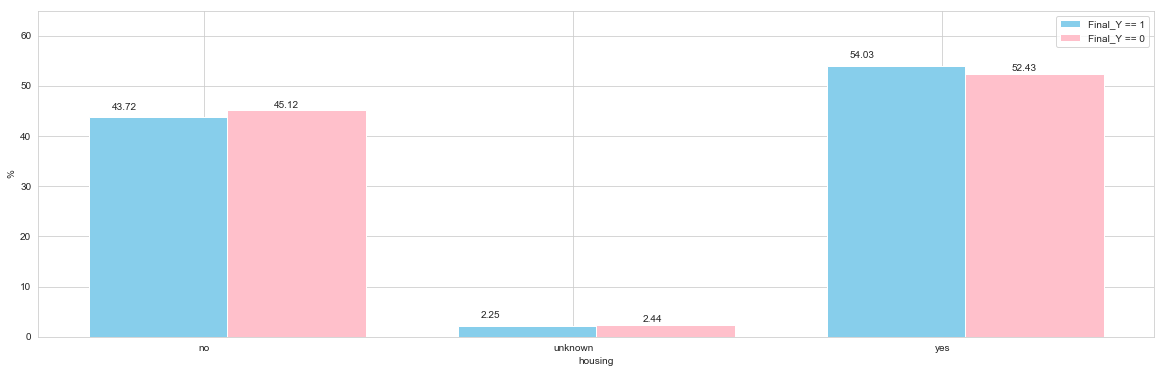

In [167]:
vis_cate_data(df_train_pos, df_train_neg, 'housing', (0,65))

---

### job

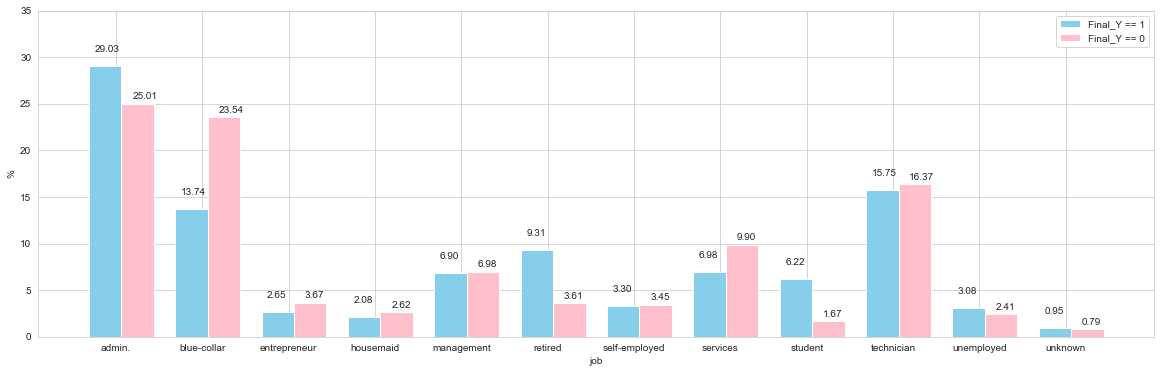

In [169]:
vis_cate_data(df_train_pos, df_train_neg, 'job', (0,35))

---

### loan

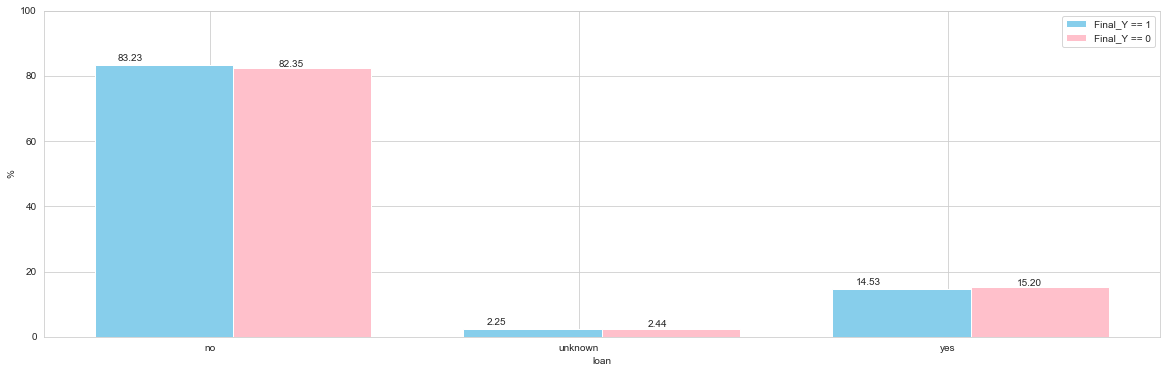

In [171]:
vis_cate_data(df_train_pos, df_train_neg, 'loan', (0,100))

---

### marital

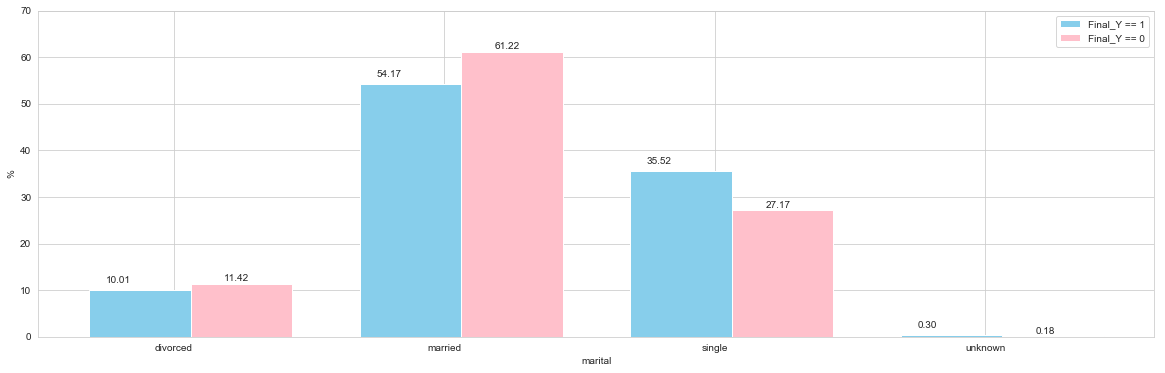

In [173]:
vis_cate_data(df_train_pos, df_train_neg, 'marital', (0,70))

---

### month

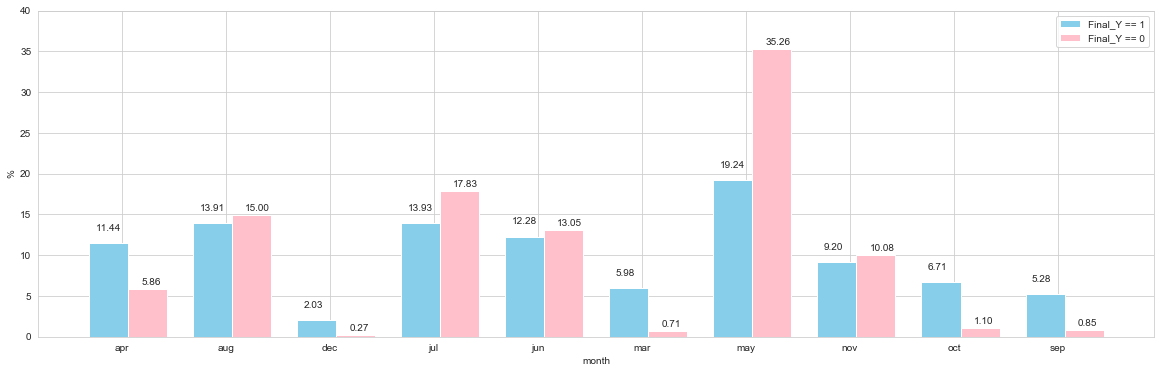

In [175]:
vis_cate_data(df_train_pos, df_train_neg, 'month', (0,40))

---

### nr.employed

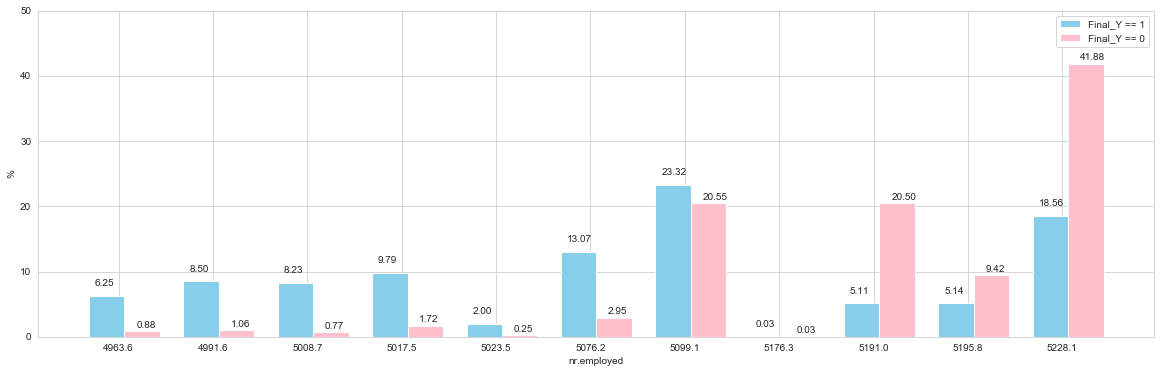

In [178]:
vis_cate_data(df_train_pos, df_train_neg, 'nr.employed', (0,50))

In [36]:
check_consistency(df_train, 'emp.var.rate', 'nr.employed')

emp.var.rate -3.4 is consistent with nr.employed {5017.5}
emp.var.rate -3.0 is consistent with nr.employed {5023.5}
emp.var.rate -2.9 is consistent with nr.employed {5076.2}
emp.var.rate -1.8 is inconsistent with nr.employed {5008.7, 5099.1}
emp.var.rate -1.7 is consistent with nr.employed {4991.6}
emp.var.rate -1.1 is consistent with nr.employed {4963.6}
emp.var.rate -0.2 is consistent with nr.employed {5176.3}
emp.var.rate -0.1 is consistent with nr.employed {5195.8}
emp.var.rate 1.1 is consistent with nr.employed {5191.0}
emp.var.rate 1.4 is consistent with nr.employed {5228.1}


---

### pdays: 

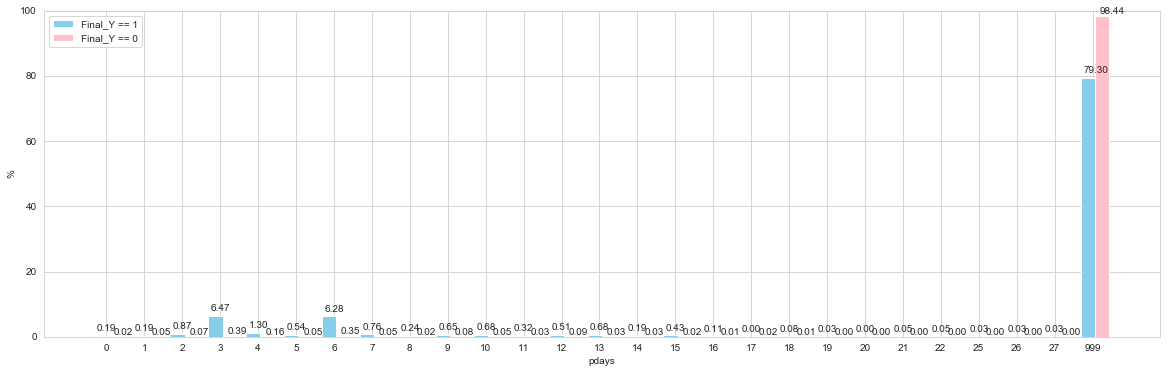

In [182]:
vis_cate_data(df_train_pos, df_train_neg, 'pdays', (0,100))

---

### poutcome

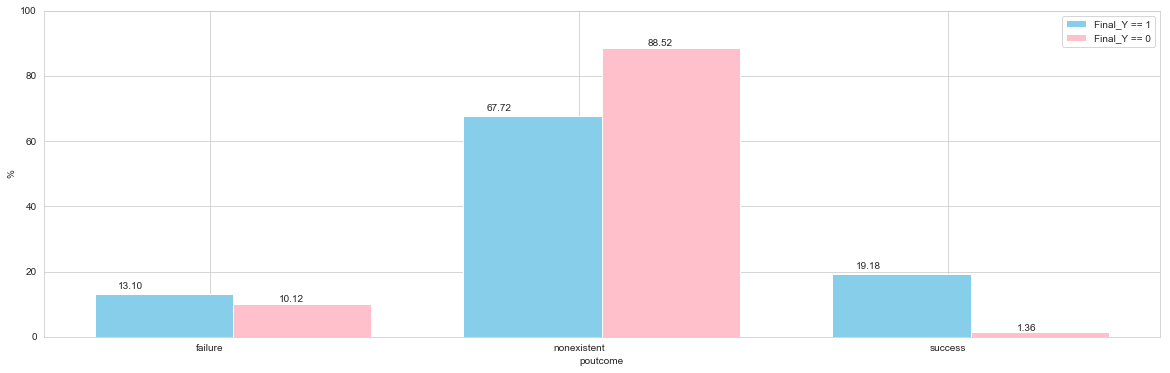

In [183]:
vis_cate_data(df_train_pos, df_train_neg, 'poutcome', (0,100))

---

### previous

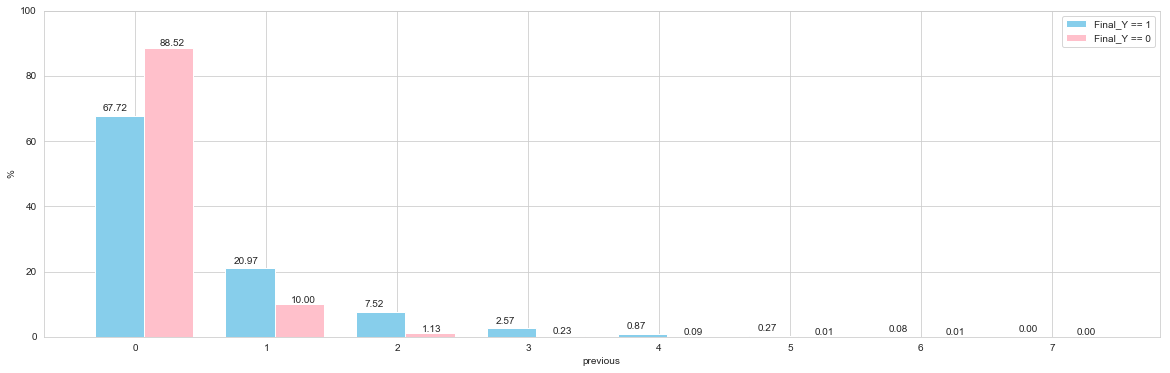

In [184]:
vis_cate_data(df_train_pos, df_train_neg, 'previous', (0,100))

---

## Conclusion

+ In this section I compared and analysed the different behaviors of positive samples and negative samples
+ I will perform preprocessing in next section